In [11]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

DATA PREPARATION

In [41]:
boston = pd.read_csv('boston.csv')

In [64]:
X = boston.drop(columns=['medv']) #Independent columns
y = boston['medv'] # Dependent column - Median value of house

In [66]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [69]:
y[1:10] # response

1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: medv, dtype: float64

In [73]:
# Splitting dataset as test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Model training and evaluation

In [81]:
# New GB Regressor object
gradient_regressor = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)

In [83]:
# n_estimators: Number of weak learners to train iteratively
# learning rate: It contributes to the weights of weak learners. It uses 1 as a default value

In [87]:
# Train Gradient Boost Regressor
model = gradient_regressor.fit(X_train, y_train)

# Predicting the response for test dataset
y_pred = model.predict(X_test)

In [89]:
r2_score(y_pred, y_test)

0.7497624807987779

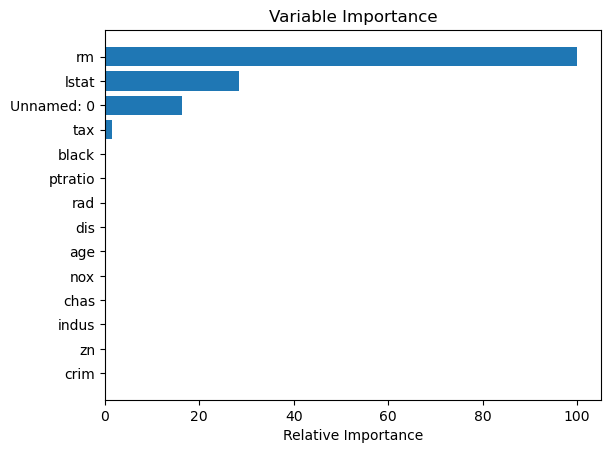

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot feature importance
feature_importance = model.feature_importances_ # Which one is more important for this model

# Making importance relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Tunning the Hypermeters

In [117]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15, 0.1, 0.1, 0.05], 'n_estimators':[100, 150, 200, 250]}

tuning = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = LR, scoring='r2')
tuning.fit(X_train, y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.15, 'n_estimators': 100}, 0.8767247393244034)